**Small Image Classification Using Convolutional Neural Network (CNN)**

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

Loading necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Here we see there are 50000 training images and 10000 test images

Normalize pixel values to between 0 and 1

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

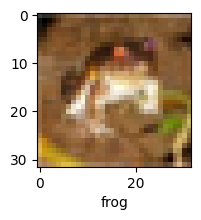

In [10]:
plot_sample(X_train, y_train, 0)

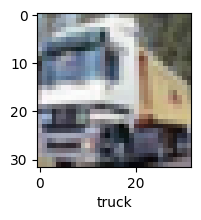

In [11]:
plot_sample(X_train, y_train, 1)

Now let us build a **Convolutional Neural Network** to train our images

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

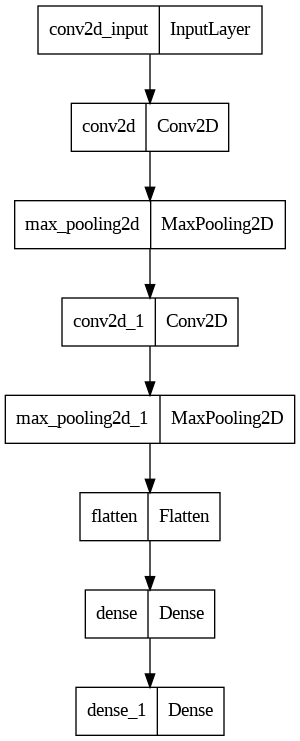

In [14]:
import pydot
from tensorflow import keras
keras.utils.plot_model(cnn)

Number of parameters in a CONV layer would be :

((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows:

((shape of width of the filter (m) * shape of height of the filter (n)* number of filters in the previous layer (d)+1)*number of filters (k)).

 Where the term “filter” refers to the number of filters in the current layer.


First Conv2D Layer= ((3x3x3) +1) x 32 = 896

---




Second Conv2D Layer = ((3x3x32)+1) x 64= 18496


Dense_3= (2304x64)+64= 147520


Dense_4=(64x10)+10=650

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4667 - accuracy: 0.4704
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0957 - accuracy: 0.6158
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9591 - accuracy: 0.6657
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8745 - accuracy: 0.6951
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8054 - accuracy: 0.7195


**With CNN, at the end 5 epochs, accuracy was at around 71% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9410 - accuracy: 0.6785


[0.9409604668617249, 0.6784999966621399]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.2116063e-03, 2.0756718e-04, 2.5354087e-02, 2.2335325e-01,
        4.6811602e-04, 5.1111951e-02, 7.0979126e-02, 2.4742502e-04,
        6.2483364e-01, 2.3319029e-04],
       [3.5557203e-02, 9.6227974e-02, 2.7066673e-04, 8.8765751e-07,
        8.9064624e-06, 3.2736214e-08, 1.4259426e-07, 3.7758306e-07,
        8.6601996e-01, 1.9137937e-03],
       [1.4342824e-02, 9.2435386e-03, 7.6465443e-04, 2.8150715e-04,
        2.2916072e-04, 5.1142026e-05, 2.8356935e-05, 3.8707913e-05,
        9.7266239e-01, 2.3577535e-03],
       [7.0503336e-01, 2.0583568e-03, 2.6942674e-02, 9.2936854e-04,
        5.9457184e-03, 1.9812853e-05, 6.1915291e-04, 1.4364666e-04,
        2.5756928e-01, 7.3864905e-04],
       [7.5284815e-06, 6.5969660e-05, 1.5365049e-02, 6.3062464e-03,
        3.1953204e-01, 4.8865140e-03, 6.5375066e-01, 8.6137979e-06,
        7.2219431e-05, 5.0835911e-06]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

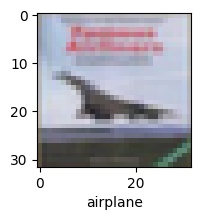

In [21]:
plot_sample(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'airplane'